## Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

## Activation function

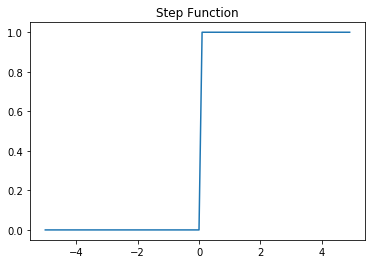

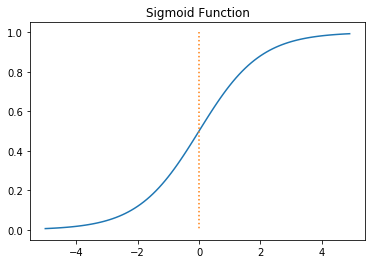

In [4]:
#step functrion
def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

#sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


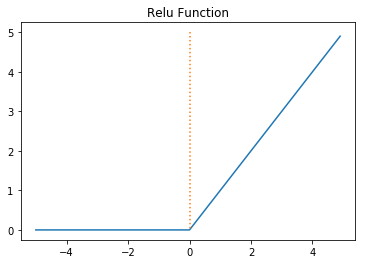

In [5]:
#ReLU function
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

## single-layer perceptron 

AND, OR 연산처리 예

In [7]:
#단층퍼셉트론으로 AND, OR 연산을 위한 함수 구현
# step함수 사용
def step(s):
    if s <= 0:       #step function (0을 기준값으로 작으면 0 크면 1로 출력)
        return 0
    else:
        return 1

def AND_b(x1,x2):
    w1,w2,b = 1,1,-1.5
    s = x1*w1 + x2*w2 + b  #transfer function, weighted sum
    y = step(s)             #activation function, step function call
    return y
    
def AND(x):
    w = np.array([1,1])
    b = -1.5
    s = np.sum(w*x) + b     #transfer function, weighted sum
    y = step(s)             #activation function, step function call
    return y

def OR(x):
    w = np.array([1,1])
    b = -0.5
    s = np.sum(w*x) + b     #transfer function, weighted sum
    y = step(s)             #activation function, step function call
    return y

In [8]:
#단층퍼셉트론으로 AND, OR, NAND 연산처리 

#입력 벡터
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
display(inputs)

#입력벡터의 AND 연산 처리
print("AND_b")
for x in inputs:
     y = AND_b(x[0], x[1])
     print('({x}) -> {y}'.format(x=x, y=y))

#입력벡터의 AND 연산 처리
print("AND")
for x in inputs:
     y = AND(x)
     print('({x}) -> {y}'.format(x=x, y=y))

#입력벡터의 OR 연산 처리
print("OR")
for x in inputs:
     y = OR(x)
     print('({x}) -> {y}'.format(x=x, y=y))

[[0, 0], [0, 1], [1, 0], [1, 1]]

AND_b
([0, 0]) -> 0
([0, 1]) -> 0
([1, 0]) -> 0
([1, 1]) -> 1
AND
([0, 0]) -> 0
([0, 1]) -> 0
([1, 0]) -> 0
([1, 1]) -> 1
OR
([0, 0]) -> 0
([0, 1]) -> 1
([1, 0]) -> 1
([1, 1]) -> 1


## single-layer perceptron 
 NAND 연산처리 예

In [9]:
def NAND(x):
    w = np.array([-1,-1])
    b = 1.5
    s = np.sum(w*x) + b     #transfer function, weighted sum
    y = step(s)             #activation function, step function call
    return y

#입력 벡터
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
display(inputs)

print("NAND")
for x in inputs:
     y = NAND(x)
     print('({x}) -> {y}'.format(x=x, y=y))


[[0, 0], [0, 1], [1, 0], [1, 1]]

NAND
([0, 0]) -> 1
([0, 1]) -> 1
([1, 0]) -> 1
([1, 1]) -> 0


In [52]:
#단층퍼셉트론으로 AND, OR, NAND 연산처리 (하나의 논리연산함수로 처리)
def OP(x,w,b):
#    tmp = np.sum(w*x) + b     #transfer function, weighted sum
    tmp = np.dot(w,x) + b     #transfer function, weighted sum
    if tmp <= 0:              #activation function, step function (0을 기준값으로 작으면 0 크면 1로 출력)
        return 0
    else:
        return 1

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
weights = [[1,1], [1,1], [-1,-1]]
bias = [-1.5, -0.5, 1.5]
ops = ["AND", "OR", "NAND"]           

for i in range(3):
    print(ops[i])
    w = np.array(weights[i])
    b = bias[i]
    for x in inputs:
        y = OP(x, w, b)
        print('({x}) -> {y}'.format(x=x, y=y))


AND
([0, 0]) -> 0
([0, 1]) -> 0
([1, 0]) -> 0
([1, 1]) -> 1
OR
([0, 0]) -> 0
([0, 1]) -> 1
([1, 0]) -> 1
([1, 1]) -> 1
NAND
([0, 0]) -> 1
([0, 1]) -> 1
([1, 0]) -> 1
([1, 1]) -> 0


In [10]:
#XOR 문제 해결을 위한 다층 퍼셉트론
#NAND, OR, AND 연산을 조합하여 XOR 연산처리
print("XOR")
for x in inputs:
     s1 = NAND(x)
     s2 = OR(x) 
     s = np.array([s1,s2])
     y = AND(s)
     print('({x}) -> {y}'.format(x=x, y=y))
    

XOR
([0, 0]) -> 0
([0, 1]) -> 1
([1, 0]) -> 1
([1, 1]) -> 0
